# Face Detection Practice

Harracascade, HOG, CNN의 방법으로 Face Detection 실행하고 비교해보자

In [3]:
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

이미지의 규격을 조절하는 `전처리 과정`이 필요합니다.<br>
기본 이미지인 `(626, 294, 3)`은 그 크기가 너무 작아서 디텍트가 되지 않습니다.

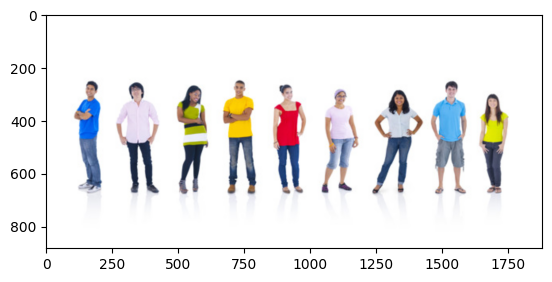

In [32]:
org_img = cv2.imread('../../assets/Images/people3.jpg')
org_img = cv2.resize(org_img, (626 * 3, 294 * 3))
cvt_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

plt.imshow(cvt_img)

## Harracascade Classifier

전처리 과정 전에는 인식이 1개도 되지 않습니다.<br>
전처리 과정을 통해서 크기를 2배~3배 가량 키우면 인식이 됩니다.

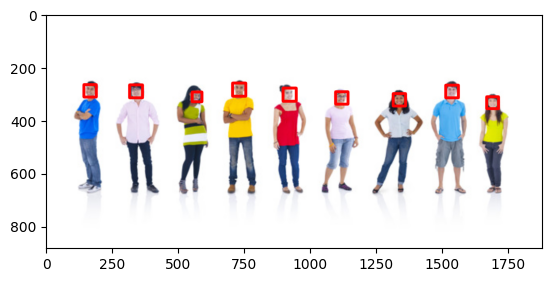

In [50]:
org_img = cv2.imread('../../assets/Images/people3.jpg')
org_img = cv2.resize(org_img, (626 * 3, 294 * 3))
cvt_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

face_detector = cv2.CascadeClassifier('../../assets/Cascades/haarcascade_frontalface_default.xml')
face_detections = face_detector.detectMultiScale(gray_img, scaleFactor=1.066, minNeighbors=3, minSize=(30, 30), maxSize=(60, 60))

for (x, y, w, h) in face_detections:
    cv2.rectangle(cvt_img, (x, y), (x+w, y+h), (255, 0 , 0), 10)
plt.imshow(cvt_img)

## HOG Classifier

전처리 과정 전에는 인식이 1개도 되지 않습니다. <br>
전처리 과정을 통해서 크기를 2배~3배 가량 키우면 인식이 됩니다.

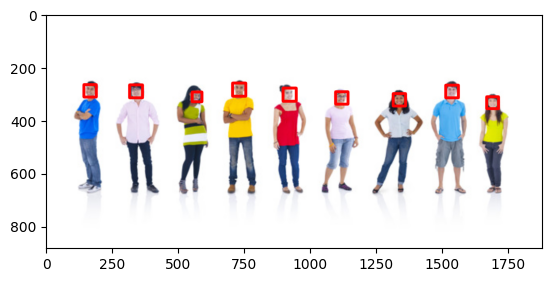

In [53]:
org_img = cv2.imread('../../assets/Images/people3.jpg')
org_img = cv2.resize(org_img, (626 * 3, 294 * 3))
cvt_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

hog_detector = dlib.get_frontal_face_detector()
hog_detections = hog_detector(org_img, 1)

for (x, y, w, h) in face_detections:
    cv2.rectangle(cvt_img, (x, y), (x+w, y+h), (255, 0 , 0), 10)
plt.imshow(cvt_img)

## CNN HOG Classifier

In [ ]:
org_img = cv2.imread('../../assets/Images/people3.jpg')
org_img = cv2.resize(org_img, (626 * 3, 294 * 3))
cvt_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)

cnn_detector = dlib.cnn_face_detection_model_v1('../../assets/Weights/mmod_human_face_detector.dat')
face_detections = cnn_detector(org_img, 2)

for face in face_detections:
    pt1, pt2, c = (face.rect.left(), face.rect.top()), (face.rect.right(), face.rect.bottom()), face.confidence
    cv2.rectangle(cvt_img, pt1, pt2, (255, 255, 0), 2)
plt.imshow(cvt_img)